In [2]:
from google.colab import files

In [5]:
uploaded = files.upload()

IMPORTING THE LIBRARY

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

SHOWING THE TYPE OF COLUMNS

In [80]:
df = pd.read_csv("911.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


TOP 5 ROWS FROM THE DATASET

In [81]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


TOP 5 ZIPCODE FOR 911 CALLS

In [82]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

TOP 5 OF TOWNSHIPS FOR 911 CALLS

In [83]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

COUNT THE TOTAL OF UNIQUE TITLE CODES FROM TITLE COLUMN

In [84]:

uniqueTitle = df['title'].unique()
np.count_nonzero(uniqueTitle)
  

110

SPLIT TITLE COLUMN WHICH CONTAIN "Reason/Departments" & ADDING A NEW COLUMN NAMED WITH Reason

In [85]:
 reason = df['title'].apply(lambda x: str(x).split(':',)[0])
 df['Reason'] = reason

SHOWING THE MOST COMMON REASON FOR A 911 CALL

In [86]:
total_Reason = df['Reason'].value_counts()
total_Reason

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

VISUALIZE THE MOST COMMON REASON WITH COUNTPLOT ON SEABORN

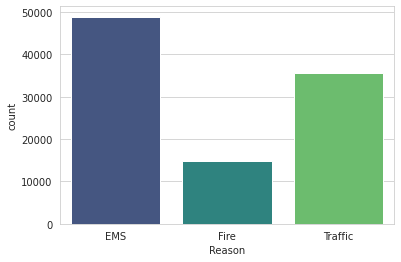

In [87]:

import seaborn as sns
sns.set_style("whitegrid")
sns.countplot(x="Reason", data=df, palette='viridis')
plt.show()

SHOW THE TYPE OF TIMESTAMP COLUMN AND CONVERT THE TIMESTAMP COLUMN INTO DATETIME FORMAT

In [88]:
type(df['timeStamp'].iloc[0])
df['timeStamp'] = df['timeStamp'].apply(lambda _: pd.to_datetime(_,format='%Y-%m-%d %H:%M:%S.%f', errors='coerce'))

In [109]:
time = df['timeStamp'].iloc[0]
time.hour

17

TRANSFORM TIMESTAMP INTO 3 NEW COLUMS, THOSE ARE 'HOUR','MONTH','DAY A WEEK

In [90]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day_of_week'] = df['timeStamp'].apply(lambda x: x.dayofweek)


TRANSFORM VALUES OF DAY OF WEEK COLUMNS INTO NAME OF DAYS IN A WEEK USING .map FUNCTION AND SHOW IT INTO A PLOT TO SEE **HOW MANY CALLS PER DAY AND PER MONTH BASED ON REASON**

In [91]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day_of_week'] = df['Day_of_week'].map(dmap)

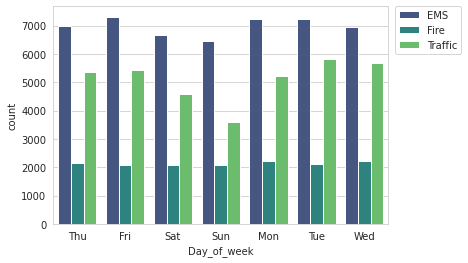

In [92]:
sns.set_style("whitegrid")
sns.countplot(x="Day_of_week",hue='Reason',data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

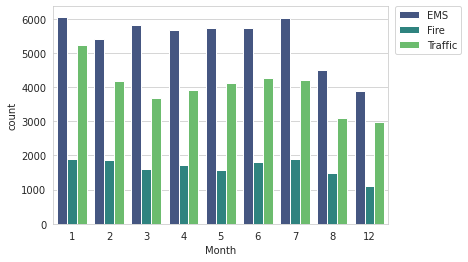

In [93]:
sns.set_style("whitegrid")
sns.countplot(x="Month",hue='Reason',data=df, palette='viridis')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

GROUPBY MONTH AND TRANSFORM IT INTO LINEPLOT TO SEE TO SEE THE INCREASE NUMBERS CALLS HAPPEN

In [96]:
byMonth = df.groupby(by='Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


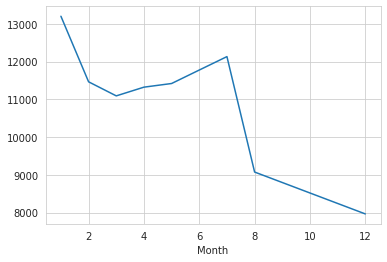

In [105]:
byMonth['twp'].plot()

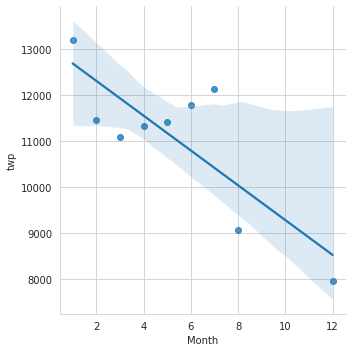

In [106]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

GROUPBY DATE AND VISUALIZE IN LINEPLOT TO SEE THE UP & DOWN OF CALLS BASED ON REASON LIKE EMS CALL, FIRE CALL, TRAFFIC CALL

In [112]:
df['Date'] = df['timeStamp'].apply(lambda date: date.date())
byDate = df.groupby('Date').count()

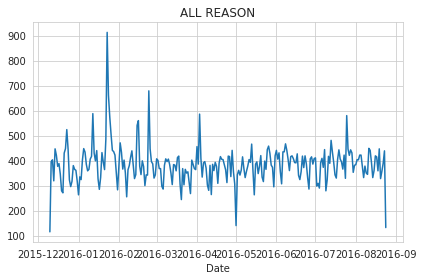

In [131]:
byDate['Reason'].plot()
plt.title('ALL REASON')
plt.tight_layout()

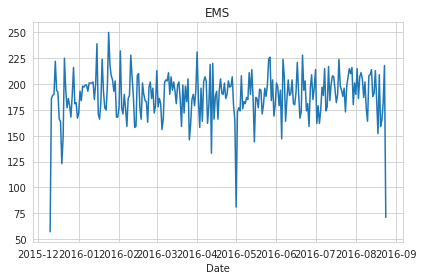

In [132]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

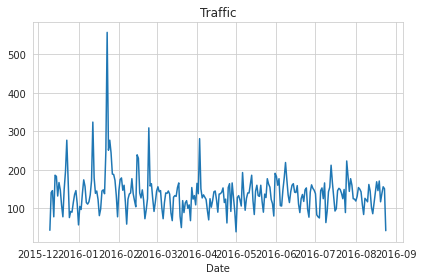

In [133]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

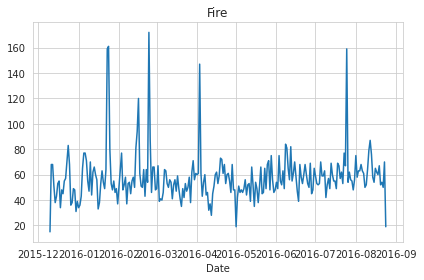

In [134]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

MAKE A NEW DATAFRAME WITH HOUR COLUMN AS A HEADER AND DAY OF WEEK AS AN INDEX 

In [136]:
dayHour = df.groupby(by=['Day_of_week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


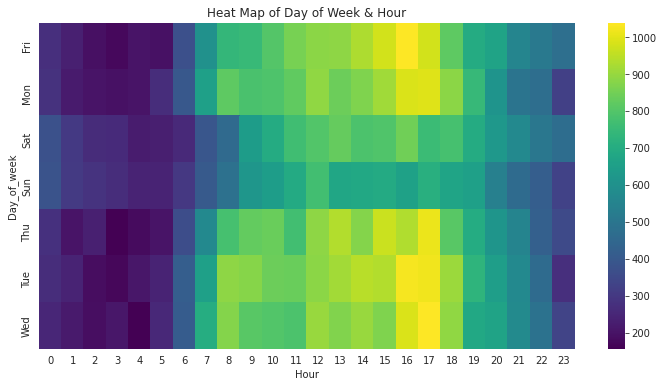

In [147]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,fmt="",cmap='viridis')
plt.title('Heat Map of Day of Week & Hour')
plt.show()

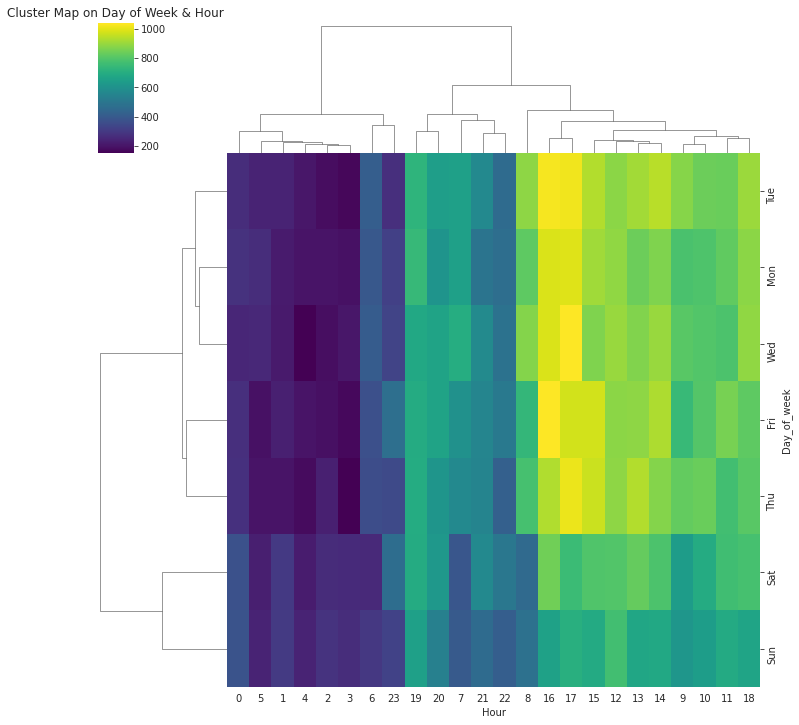

In [148]:
sns.clustermap(dayHour,cmap='viridis')
plt.title('Cluster Map on Day of Week & Hour')
plt.show()

In [144]:
dayMonth = df.groupby(by=['Day_of_week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day_of_week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


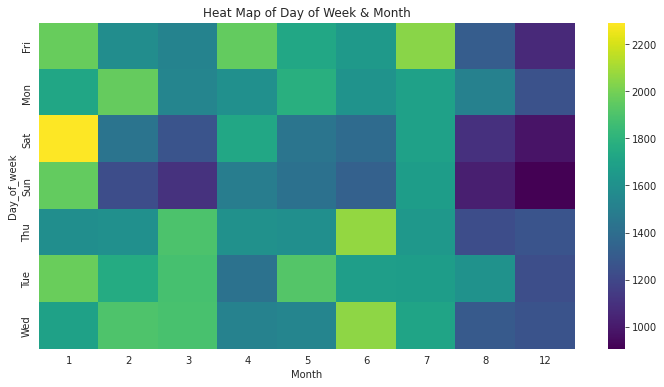

In [150]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,fmt="",cmap='viridis')
plt.title('Heat Map of Day of Week & Month')
plt.show()

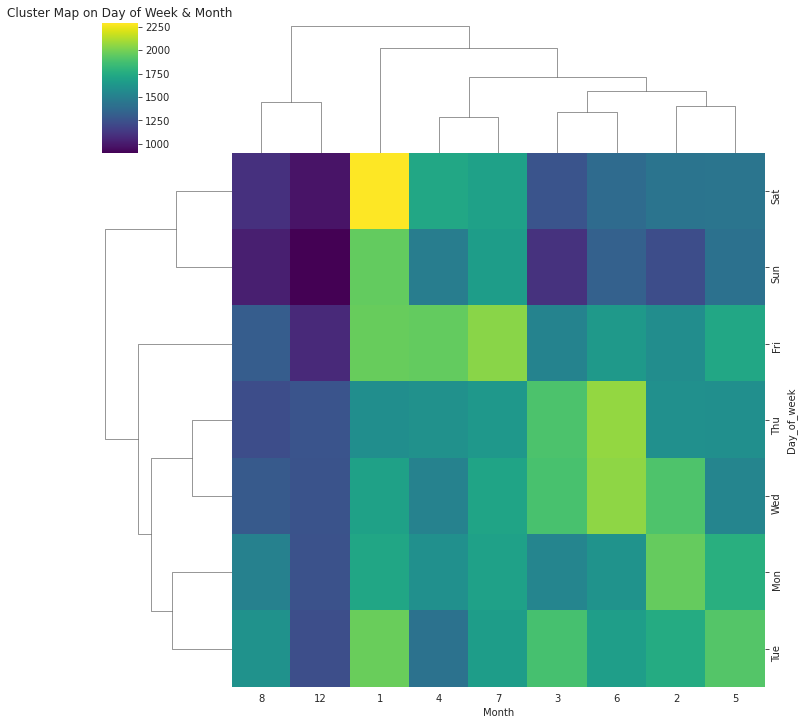

In [149]:
sns.clustermap(dayMonth,cmap='viridis')
plt.title('Cluster Map on Day of Week & Month')
plt.show()